In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(title='Image', image=None, size=10):
    w, h = image.shape[0], image.shape[1]
    ratio = w/h
    plt.figure(figsize=(ratio * size, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Transformations and Translations/Rotations

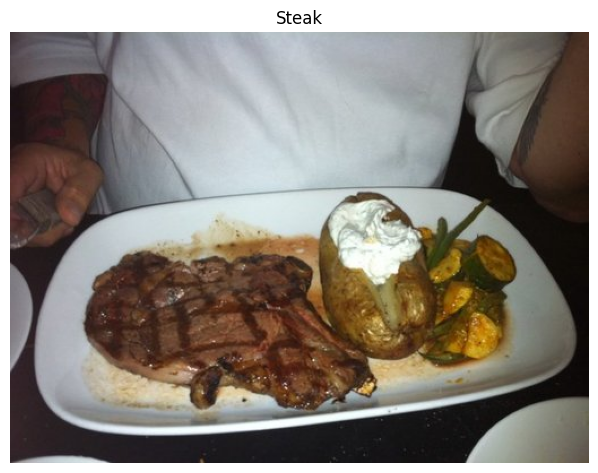

In [4]:
image = cv2.imread('/kaggle/input/pizzansushisteak/pizza_steak_sushi/train/steak/100135.jpg')
imshow('Steak', image)

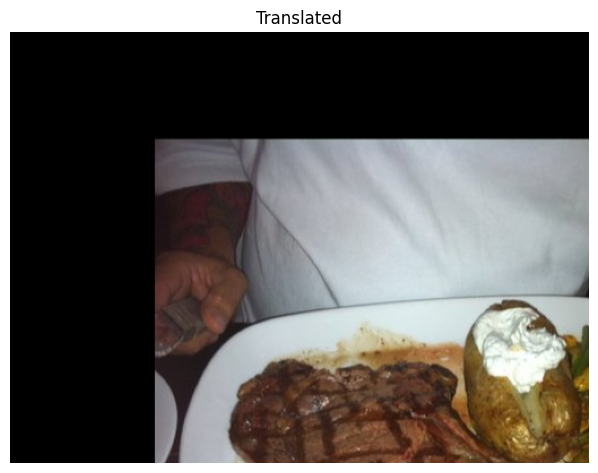

In [6]:
# Translate
height, width = image.shape[:2]

qU_ht, qU_wh = height/4, width/4

T = np.float64([[1, 0, qU_wh], [0,1,qU_ht]])

img_trans = cv2.warpAffine(image, T, (width, height))
imshow("Translated", img_trans)

In [7]:
print(T)

[[  1.    0.  128. ]
 [  0.    1.   95.5]]


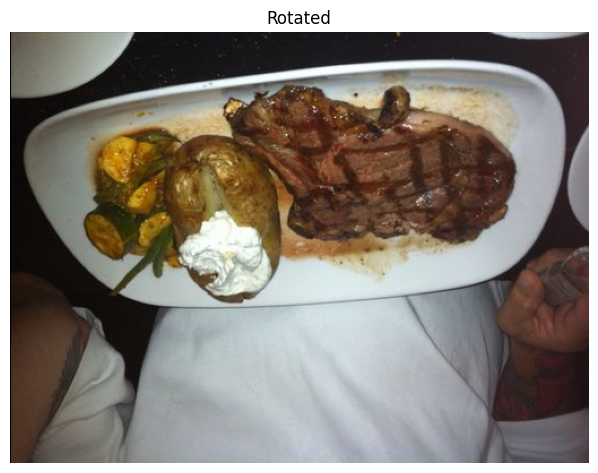

In [19]:
# Rotation
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 180, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow('Rotated', rotated_image)

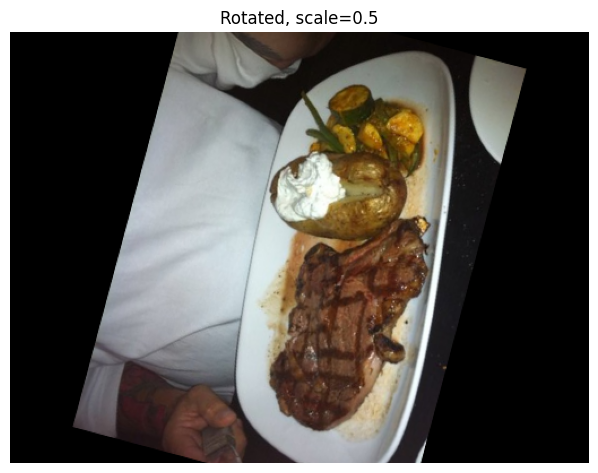

In [22]:
# Rotation
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 75, 0.8)
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow('Rotated, scale=0.5', rotated_image)

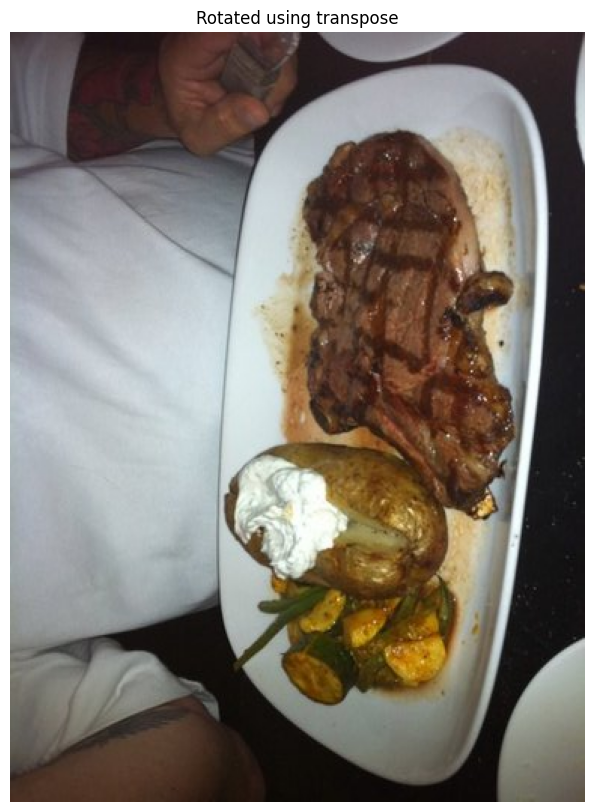

In [23]:
# Rotation with transpose
rot = cv2.transpose(image)
imshow('Rotated using transpose', rot)

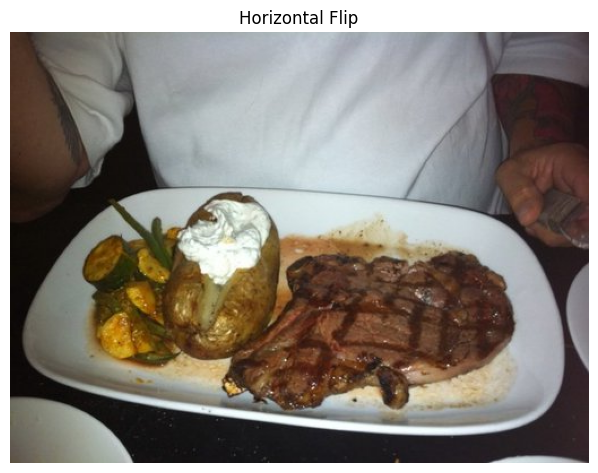

In [24]:
# Flip horizontal
flipped = cv2.flip(image, 1)
imshow('Horizontal Flip', flipped)

Functions:
```cv2.warpAffine(image, T, (width, height))```
```cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)```

# **Scaling, Re-sizing, Interpolations and Cropping**

Re-sizing is a simple function that we execute using the cv2.resize function, it's arguments are:

```cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)```
- if dsize is None the output image is calculated as a function of scaling using x & y scale 

#### **List of Interpolation Methods:**
- cv2.INTER_AREA - Good for shrinking or down sampling
- cv2.INTER_NEAREST - Fastest
- cv2.INTER_LINEAR - Good for zooming or up sampling (default)
- cv2.INTER_CUBIC - Better
- cv2.INTER_LANCZOS4 - Best

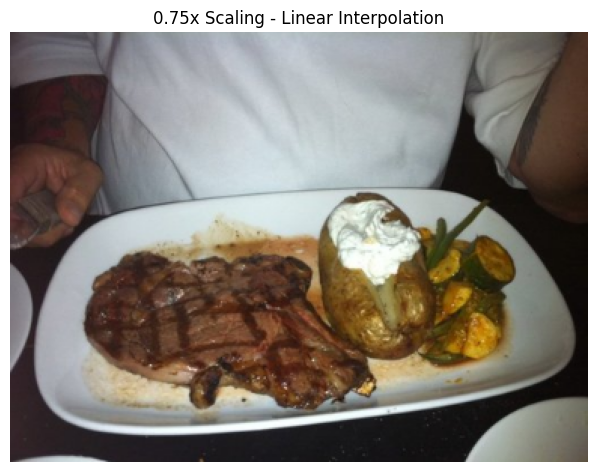

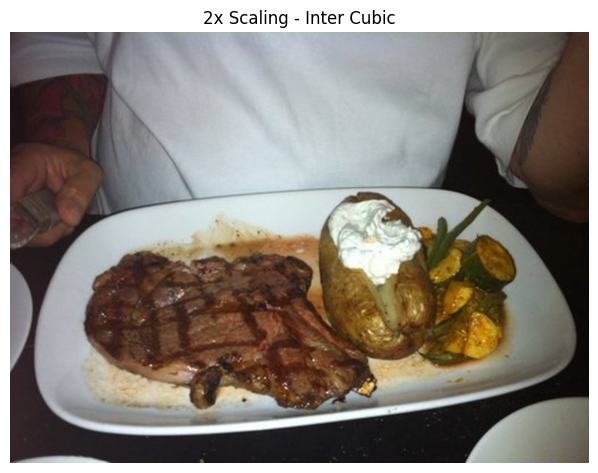

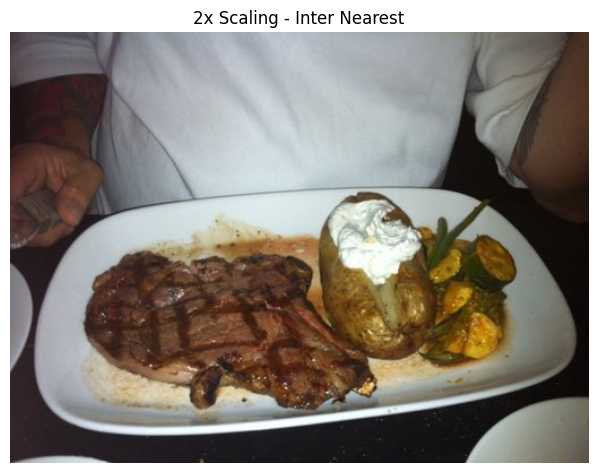

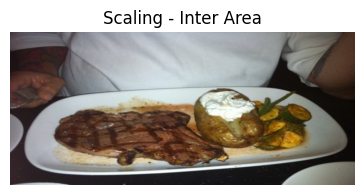

In [25]:
# If no interpolation is specified cv.INTER_LINEAR is used as default
# Let's make our image 3/4 of it's original size
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
imshow("0.75x Scaling - Linear Interpolation", image_scaled)

# Let's double the size of our image
img_scaled2 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
imshow("2x Scaling - Inter Cubic", img_scaled2)

# Let's double the size of our image using inter_nearest interpolation
img_scaled3 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_NEAREST)
imshow("2x Scaling - Inter Nearest", img_scaled3)

# Let's skew the re-sizing by setting exact dimensions
img_scaled4 = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
imshow("Scaling - Inter Area", img_scaled4)

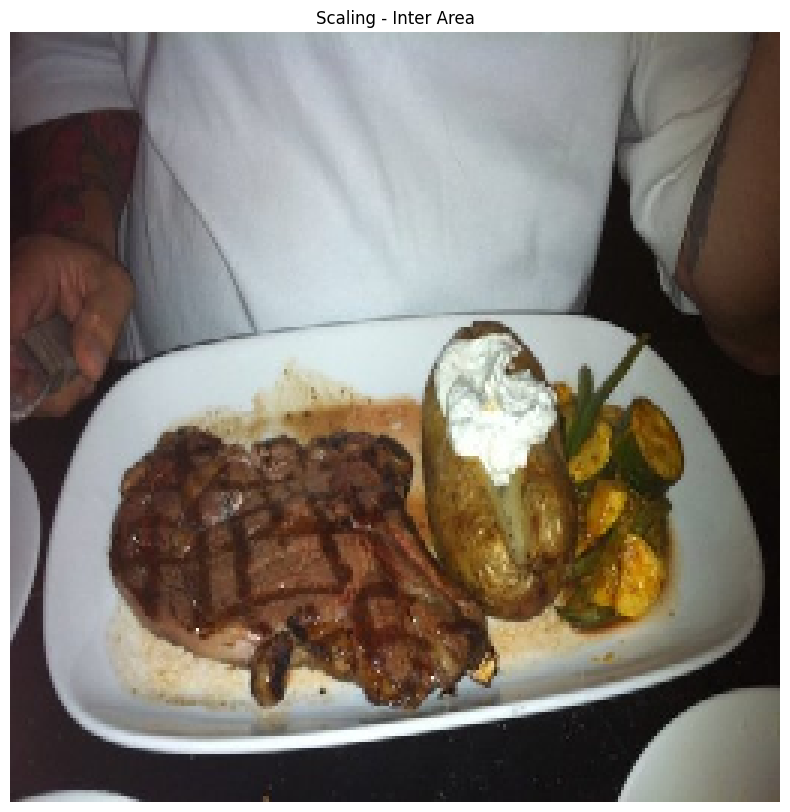

In [32]:
img_scaled4 = cv2.resize(image, (256, 256), interpolation = cv2.INTER_NEAREST)
imshow("Scaling - Inter Area", img_scaled4)

# Image Pyraminds

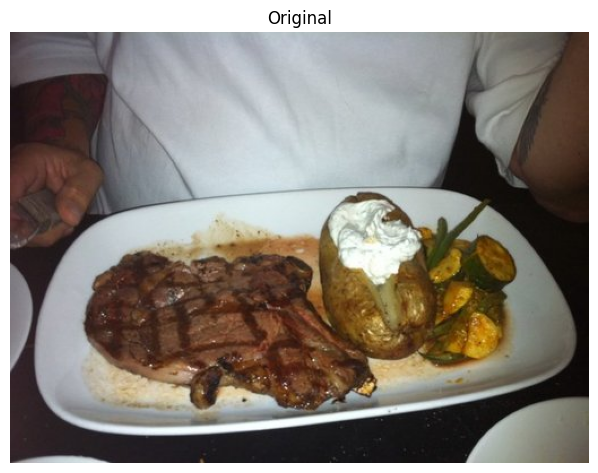

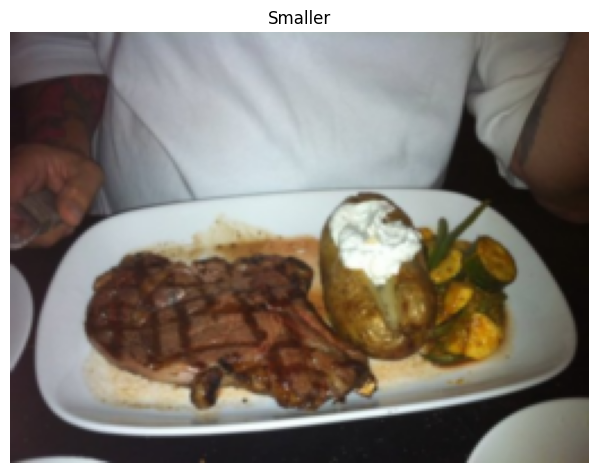

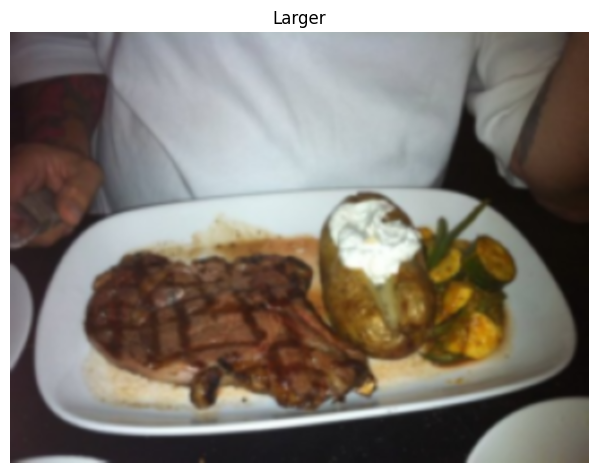

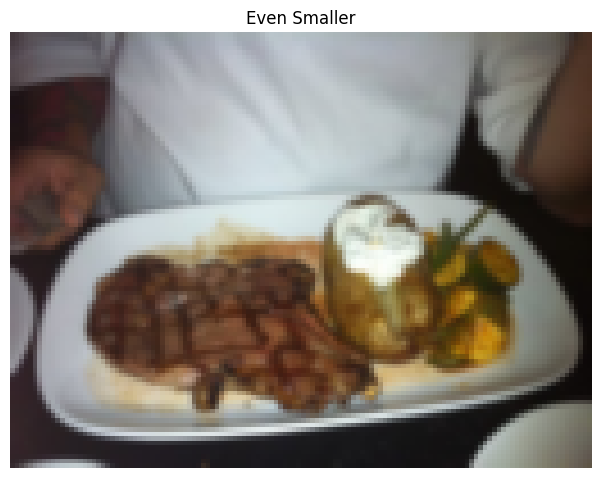

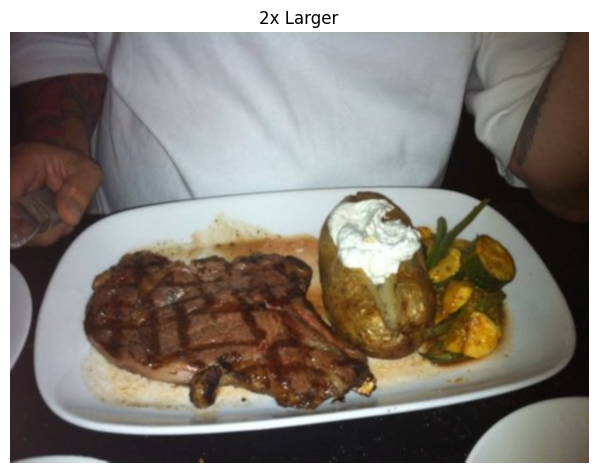

In [35]:
smaller = cv2.pyrDown(image)
larger = cv2.pyrUp(smaller)


imshow("Original", image)
imshow('Smaller', smaller)
imshow('Larger', larger)

even_larger = cv2.pyrUp(cv2.pyrUp(image))
even_smaller = cv2.pyrDown(smaller)
imshow('Even Smaller', even_smaller)
imshow('2x Larger', even_larger)

# Cropping

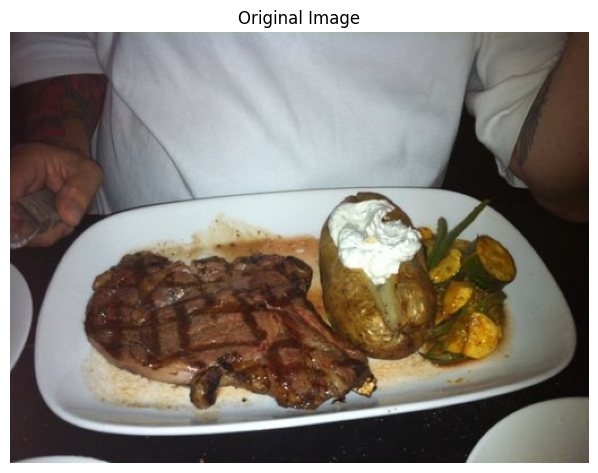

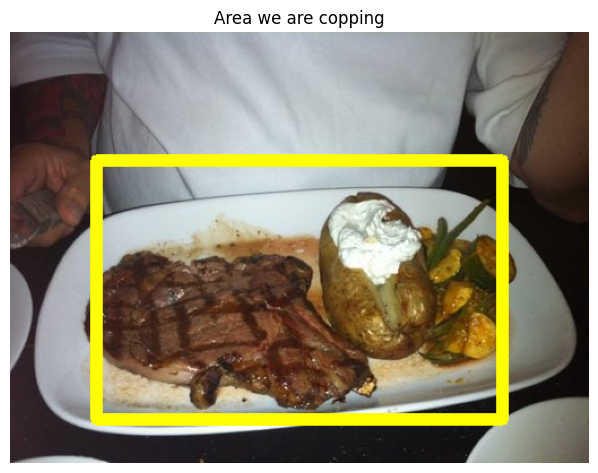

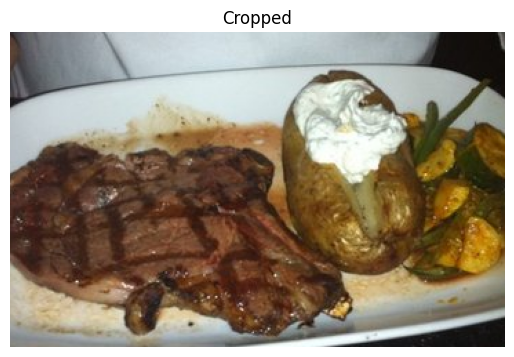

In [48]:
height, weight = image.shape[:2]

start_row, start_col = int(height * .30), int(width * .15)

end_row, end_col = int(height * .90), int(width * .85)

cropped = image[start_row:end_row, start_col:end_col]

imshow("Original Image", image)

copy = image.copy()
cv2.rectangle(copy, (start_col, start_row), (end_col, end_row), (0,255,255),10)

imshow("Area we are copping", copy)
imshow("Cropped", cropped)